In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [60]:
df = pd.read_csv(r'C:\Users\estre\Downloads\coin_Dogecoin.csv', parse_dates=['Date'])
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2631 non-null   int64         
 1   Name       2631 non-null   object        
 2   Symbol     2631 non-null   object        
 3   Date       2631 non-null   datetime64[ns]
 4   High       2631 non-null   float64       
 5   Low        2631 non-null   float64       
 6   Open       2631 non-null   float64       
 7   Close      2631 non-null   float64       
 8   Volume     2631 non-null   float64       
 9   Marketcap  2631 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 205.7+ KB


In [62]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2.631000e+03,2.631000e+03
mean,1316.000000,0.002566,0.002243,0.002394,0.002410,1.063104e+08,2.874625e+08
std,759.648603,0.006796,0.005422,0.006064,0.006118,8.458638e+08,7.822927e+08
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,658.500000,0.000229,0.000220,0.000224,0.000224,2.338655e+05,2.314820e+07
50%,1316.000000,0.001645,0.001387,0.001523,0.001523,4.485170e+06,1.552847e+08
75%,1973.500000,0.002810,0.002625,0.002710,0.002714,3.863918e+07,3.298987e+08
max,2631.000000,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10


In [50]:
# Formatting the time 

df['Date'] = pd.to_datetime(df['Date']).dt.date

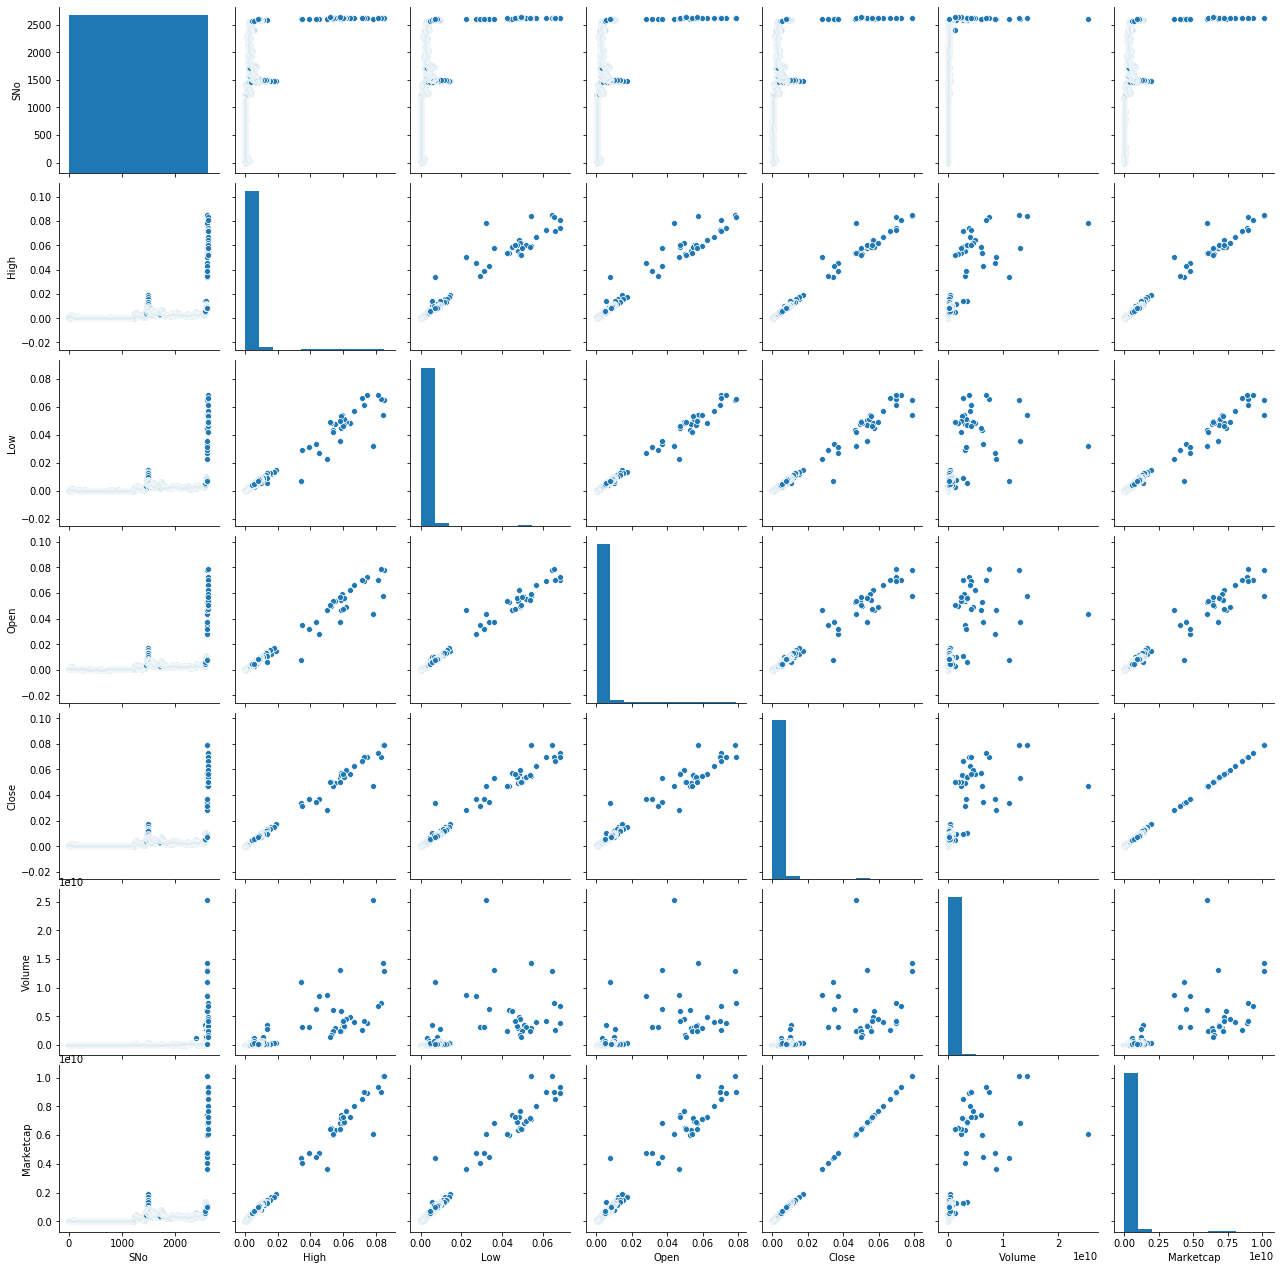

In [63]:
sns.pairplot(df)

In [66]:
Date_Marketcap = df[['Date','Marketcap']]
Date_Marketcap.head()

,Date,Marketcap
0,2013-12-16 23:59:59,1.509085e+06
1,2013-12-17 23:59:59,2.169688e+06
2,2013-12-18 23:59:59,3.188943e+06
3,2013-12-19 23:59:59,1.115034e+07
4,2013-12-20 23:59:59,7.284337e+06


Text(0, 0.5, 'Marketcap')

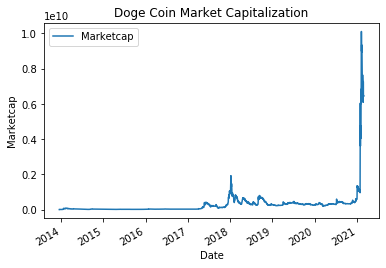

In [78]:
#  Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. 
# Market Capitalization growth throughout the years
TimevsMarketcap = Date_Marketcap.set_index('Date')
TimevsMarketcap.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Marketcap')

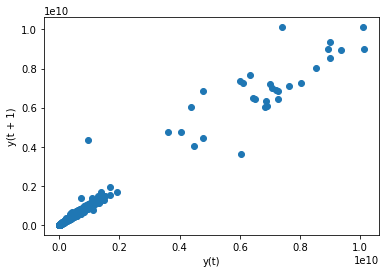

In [69]:
#Marketcap data distribution 
pd.plotting.lag_plot(df['Marketcap'])

In [70]:
Date_Close = df[['Date','Close']]
Date_Close.head()

,Date,Close
0,2013-12-16 23:59:59,0.000205
1,2013-12-17 23:59:59,0.000269
2,2013-12-18 23:59:59,0.000362
3,2013-12-19 23:59:59,0.001162
4,2013-12-20 23:59:59,0.000704


Text(0, 0.5, 'Close')

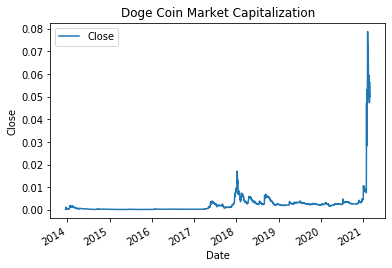

In [79]:
TimevsClose = Date_Close.set_index('Date')
TimevsClose.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Close')